In [71]:
import numpy as np

In [72]:
class Perceptron:
    #パーセプトロン分類器
    
    #パラメータ
    # eta:float
    # n_iter:int
    # random_state:int
    # w_:[]
    # b_:[]
    # errors:[]
    def __init__(self,eta=0.01,n_iter=59,rondom_state=1):
        self.eta=eta
        self.n_iter=n_iter
        self.random_state=rondom_state
    def fit(self,X,y):
        # self:object
        rgen=np.random.RandomState(self.random_state)
        self.w_=rgen.normal(loc=0.0,scale=0.01,size=X.shape[1])
        self.b_=np.float_(0.)
        self.errors_=[]

        for _ in range(self.n_iter):
            errors=0
            for xi, target in zip(X,y):
                update=self.eta*(target-self.predict(xi))
                self.w_+=update*xi
                self.b_+=update
                errors+=int(update!=0.0)
            self.errors_.append(errors)
        return self
    def net_input(self,X):
        return np.dot(X,self.w_)+self.b_
    def predict(self,X):
        return np.where(self.net_input(X)>=0.0,1,0)


In [73]:
import os
import pandas as pd
s="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
print("From URL:",s)
df=pd.read_csv(s,header=None,encoding="utf-8")
df.tail()

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


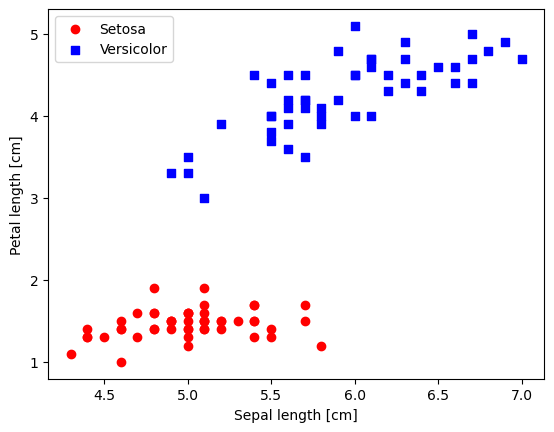

In [74]:
import matplotlib.pyplot as plt
import numpy as np
#1-100行目の目的変数の抽出
y=df.iloc[0:100,4].values
#setosa=0,versicolor=1
y=np.where(y=="Iris-setosa",0,1)
#1-100行目の1,3列目を抽出
x=df.iloc[0:100,[0,2]].values
#品種setosaのプロット=赤の丸
plt.scatter(x[:50,0],x[:50,1],color="red",marker="o",label="Setosa")
#品種versicolorのプロット=青の■
plt.scatter(x[50:100,0],x[50:100,1],color="blue",marker="s",label="Versicolor")
#軸ラベルの設定
plt.xlabel("Sepal length [cm]")
plt.ylabel("Petal length [cm]")
#凡例の設定
plt.legend(loc="upper left")
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

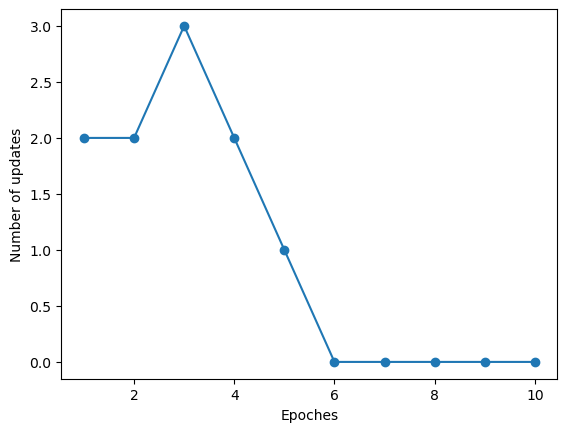

In [75]:
#パーセプトロンのオブジェクトの生成(インスタンス化)
ppn=Perceptron(eta=0.1,n_iter=10)
#訓練データへのモデルの適合
ppn.fit(x,y)
#エポックと誤分類の関係を表す折れ線グラフ
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,marker="o")
#軸のラベルの設定
plt.xlabel("Epoches")
plt.ylabel("Number of updates")
#図の表示
plt.show

In [76]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(x,y,classifier,resolution=0.02):
    #マーカーとカラーマップの準備
    markers=("o","s","^","v","<")
    colors=("red","blue","lightgreen","gray","cyan")
    cmap=ListedColormap(colors[:len(np.unique(y))])
    x1_min,x1_max=x[:,0].min()-1,x[:,0].max()+1
    x2_min,x2_max=x[:,1].min()-1,x[:,1].max()+1
    #グリッドポイントの生成
    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),
                        np.arange(x2_min,x2_max,resolution))
    #各特徴量を1次元配列に変換して予測を実行
    lab=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    #予測結果をもとのグリッドポイントのデータサイズに変換
    lab=lab.reshape(xx1.shape)
    #グリッドポイントの等高線をプロット
    plt.contourf(xx1,xx2,lab,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.xlim(xx2.min(),xx2.max())
    #クラスごとに訓練データをプロット
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y==cl,0],
                    y=x[y==cl,1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f"Class{cl}",
                    edgecolors="black")

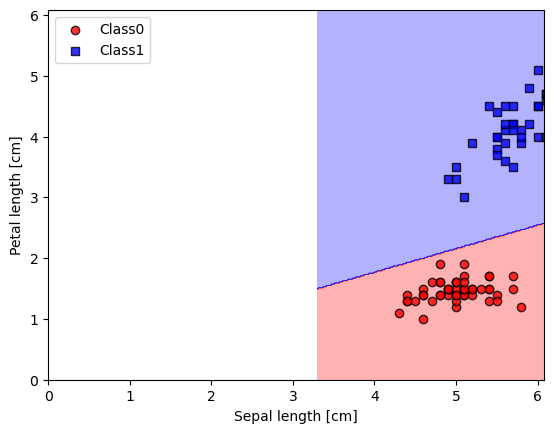

In [77]:
#決定領域のプロット
plot_decision_regions(x,y,classifier=ppn)
#軸ラベルの決定
plt.xlabel("Sepal length [cm]")
plt.ylabel("Petal length [cm]")
#凡例の決定
plt.legend(loc="upper left")
#図の表示
plt.show()

In [78]:
class AdalineGD:
    #パーセプトロン分類器
    
    #パラメータ
    # eta:float
    # n_iter:int
    # random_state:int
    # w_:[]
    # b_:[]
    # errors:[]
    def __init__(self,eta=0.01,n_iter=59,rondom_state=1):
        self.eta=eta
        self.n_iter=n_iter
        self.random_state=rondom_state
    def fit(self,X,y):
        # self:object
        rgen=np.random.RandomState(self.random_state)
        self.w_=rgen.normal(loc=0.0,scale=0.01,size=X.shape[1])
        self.b_=np.float_(0.)
        self.losses_ =[]

        for i in range(self.n_iter):#訓練回数分まで訓練データを反復
            #activationメソッドは単なる恒等関数であるため、
            #このコードでは何の効果もないことに注意。代わりに、
            #直接"output=self.net_input[X]"と記述することもできた
            net_input=self.net_input(x)
            output=self.activation(net_input)
            #誤差の計算
            errors=(y-output)
            #重みの更新
            self.w_+=self.eta*2.0*X.T.dot(errors)/X.shape[0]
            #バイアスの更新
            self.b_+=self.eta*2.0*errors.mean()
            #損失関数の計算
            loss=(errors**2).mean()
            #損失値の追加
            self.losses_.append(loss)
        return self
    def net_input(self,X):
        #総入力
        return np.dot(X,self.w_)+self.b_
    def activation(self,X):
        return X
    def predict(self,X):
        return np.where(self.activation(self.net_input(X))>=0.5,1,0)


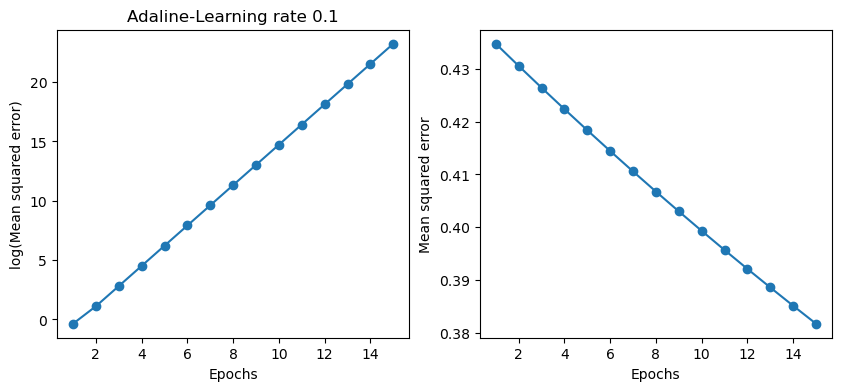

In [79]:
import matplotlib.pyplot as plt
#描画領域を1行2列に分割
flg,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,4))
#勾配降下法によるADALINEの学習(学習率 eta=0.1)
ada1=AdalineGD(n_iter=15,eta=0.1).fit(x,y)
#エポック数と損失関数の関係を表す折れ線グラフのプロット
ax[0].plot(range(1,len(ada1.losses_)+1),np.log10(ada1.losses_),marker="o")
#軸のラベルの設定
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("log(Mean squared error)")
#勾配降下法によるADALINEの学習(学習率 eta=0.0001)
ada2=AdalineGD(n_iter=15,eta=0.0001).fit(x,y)
#エポック数と損失関数の関係を表す折れ線グラフ
ax[1].plot(range(1,len(ada2.losses_)+1),ada2.losses_,marker="o")
#軸のラベルの設定
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Mean squared error")
#タイトルの設定
ax[0].set_title("Adaline-Learning rate 0.1")
#図の表示
plt.show()